## Linear Regression

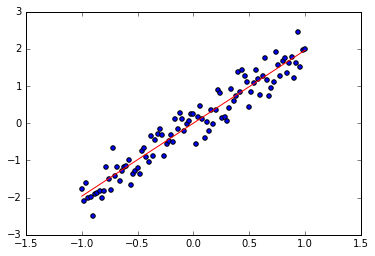

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.mul(X, w)

w = tf.Variable(0.0, name="weights")

y_model = model(X,w)
cost = (tf.square(Y-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X:x, Y:y})
    w_val = sess.run(w)

sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

## Polynomial Model

* When data points appear to form smooth curves rather than straight lines, we need to change our regression model from a straight line to something else.
* One such approach is to use a polynomial model.
* A polynomial is a generalization of a linear function.
* The $n^{th}$ degree polynomial looks like the following :
* f(x) = $WnX^{n}$ + … + $W2X^{2}$ + $W1X$ + $W0$

[ 0.99399704  1.85539973  3.0457902   4.61028671  4.95705795  5.48874378]


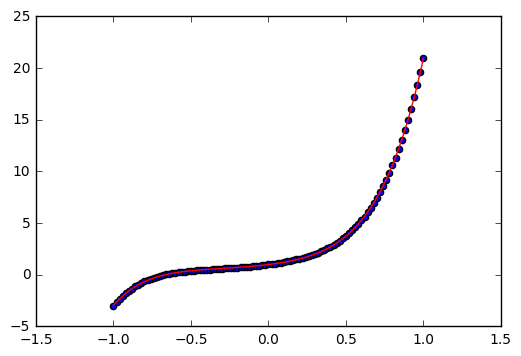

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_coeffs = 6
training_epochs = 400
learning_rate = 0.01

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.mul(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

def gettrY():
    trY = 0
    trY_coeffs = [1,2,3,4,5,6]
    for i in range(num_coeffs):
        trY += trY_coeffs[i] * np.power(trX, i)
    
    trY += np.random.randn(*trX.shape) * 1.5
    return trY

def gettrX():
    return np.linspace(-1, 1, 101)

trX = gettrX()
trY = gettrY()
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X:x, Y:y})
        
w_val = sess.run(w)
print(w_val)

sess.close()

plt.scatter(trX, trY)
trY2 = 0

for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
plt.plot(trX, trY2, 'r')
plt.show()

## Evaluating regularization parameters

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.001
training_epochs = 1000
reg_lambda = 0.

x_dataset = np.linspace(-1, 1, 100)

num_coeffs = 9
y_dataset_params = [0.] * num_coeffs
y_dataset_params[2] = 1
y_dataset = 0

def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = (int)(ratio * x_dataset.size)    
    
    x_train = x_dataset[arr[0:num_train]]
    y_train = y_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test


for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
y_dataset += np.random.randn(*x_dataset.shape) * 0.3

(x_train, x_test, y_train, y_test) = split_dataset(x_dataset, y_dataset, 0.7)

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.mul(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y - y_model)),
                    tf.mul(reg_lambda, tf.reduce_sum(tf.square(w)))),
             2*x_train.size)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for reg_lambda in np.linspace(0,1,100):
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X:x_train, Y:y_train})
    final_cost = sess.run(cost, feed_dict={X:x_test, Y:y_test})
    print('reg lambda', reg_lambda)
    print('final cost', final_cost)

sess.close()

('reg lambda', 0.0)
('final cost', 0.029163603)
('reg lambda', 0.010101010101010102)
('final cost', 0.02395631)
('reg lambda', 0.020202020202020204)
('final cost', 0.021796824)
('reg lambda', 0.030303030303030304)
('final cost', 0.020335738)
('reg lambda', 0.040404040404040407)
('final cost', 0.019247403)
('reg lambda', 0.050505050505050511)
('final cost', 0.018418711)
('reg lambda', 0.060606060606060608)
('final cost', 0.017779322)
('reg lambda', 0.070707070707070718)
('final cost', 0.017279621)
('reg lambda', 0.080808080808080815)
('final cost', 0.016883919)
('reg lambda', 0.090909090909090912)
('final cost', 0.016566399)
('reg lambda', 0.10101010101010102)
('final cost', 0.016308246)
('reg lambda', 0.11111111111111112)
('final cost', 0.016095648)
('reg lambda', 0.12121212121212122)
('final cost', 0.015918365)
('reg lambda', 0.13131313131313133)
('final cost', 0.015768737)
('reg lambda', 0.14141414141414144)
('final cost', 0.015640981)
('reg lambda', 0.15151515151515152)
('final cost